In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

data_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
# Display the data table for preview
data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice and how many times each unique mouse id appears

data_df["Mouse ID"].value_counts()

g989    13
j119    10
c758    10
s185    10
c264    10
        ..
n482     1
x226     1
f932     1
u153     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = data_df[data_df.duplicated(["Mouse ID", "Timepoint"],keep = False)]

In [4]:
duplicate_mouse_id= duplicate_mouse["Mouse ID"].unique()

In [5]:
dup_mouse_id=(duplicate_mouse_id[0])


In [6]:
data_df2 = data_df.copy()


In [7]:
data_df2 = (data_df2.loc[data_df["Mouse ID"] != dup_mouse_id,:])

In [8]:
data_df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
data_df2["Mouse ID"].value_counts()

j119    10
c758    10
r604    10
c264    10
t718    10
        ..
x226     1
n482     1
l872     1
h428     1
v199     1
Name: Mouse ID, Length: 248, dtype: int64

In [10]:
#Summary Stats


In [11]:
reg_groups = data_df2.groupby("Drug Regimen")

In [12]:
group_tumor_mean = reg_groups["Tumor Volume (mm3)"].mean()

In [13]:
group_tumor_med = reg_groups["Tumor Volume (mm3)"].median()

In [14]:
print(group_tumor_med)

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64


In [15]:
group_tumor_var =reg_groups["Tumor Volume (mm3)"].var()

In [16]:
group_tumor_std = reg_groups["Tumor Volume (mm3)"].std()

In [18]:
group_tumor_sem = reg_groups["Tumor Volume (mm3)"].sem()

In [19]:
df_frame = {"Mean Tumor Volume": group_tumor_mean,
            "Median Tumor Volume": group_tumor_med,
            "Tumor Volume Variance": group_tumor_var,
            "Tumor Volume Std. Dev.": group_tumor_std,
            "Tumor Volume Std. Err.": group_tumor_sem}

In [20]:
sum_stat_df = pd.DataFrame(df_frame)

In [21]:
sum_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
agg_sum_stat = (reg_groups["Tumor Volume (mm3)"]).agg(func = ['mean','median','var','std','sem'])

In [23]:
agg_sum_stat

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
#bar plot showing total number of measurements taken on each regimen
#get total number of measurements for each regimen
num_measurements = reg_groups["Tumor Volume (mm3)"].unique()


In [26]:
num_measurements2= len(num_measurements[0])

In [27]:
count_meas = reg_groups["Tumor Volume (mm3)"].count()

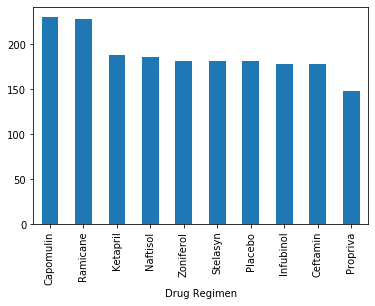

In [28]:
count_meas1 = count_meas.sort_values(ascending = False)
count_graph1 = count_meas1.plot(kind = 'bar')


<BarContainer object of 10 artists>

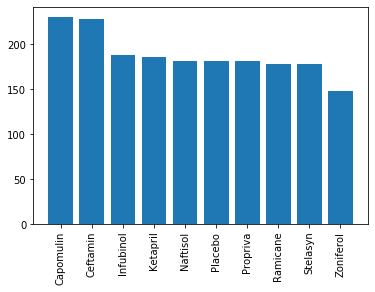

In [29]:
count2 = plt.figure()
x = ["Capomulin","Ceftamin", "Infubinol","Ketapril","Naftisol","Placebo","Propriva", "Ramicane","Stelasyn","Zoniferol"]
ticks = np.arange(len(x))
plt.xticks(ticks,x, rotation = 90)
plt.bar(x,count_meas1)


In [30]:
#pie plots

In [31]:
#get gender distribution
gend_group= data_df2.groupby("Sex")

In [32]:
gend_dist_count = gend_group["Sex"].count()

In [33]:
gend_dist_count =gend_dist_count.sort_values(ascending = False)

In [34]:
gend_tot = ((gend_dist_count[0])+(gend_dist_count[1]))

In [35]:
gend_dist = gend_dist_count/gend_tot

In [36]:
gend_dist

Sex
Male      0.509574
Female    0.490426
Name: Sex, dtype: float64

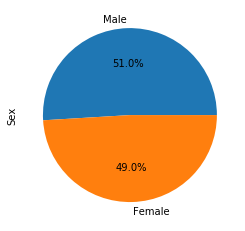

In [37]:
pie_try1 = gend_dist_count.plot(kind = "pie", autopct="%.1f%%")

Text(0, 0.5, 'Sex')

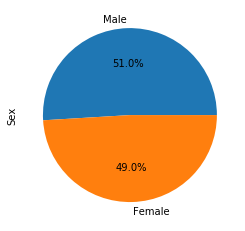

In [38]:
#pie plot using pyplot
pieChart2 = plt.figure()
pieChart2
genders = ["Male", "Female"]
pie2 = plt.pie(gend_dist_count,labels = genders, autopct="%1.1f%%")
plt.ylabel("Sex")

In [39]:
data_df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [40]:
data_df80 = data_df2.copy()
data_df80=data_df80.sort_values("Mouse ID")
data_df80_group = data_df80.groupby("Mouse ID")
data_df81 = data_df80_group["Timepoint"].max()
data_df80.set_index("Mouse ID")
data_df90 = pd.merge(data_df80,data_df81, how = "outer", on='Mouse ID')
data_df90

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,a203,Infubinol,Female,20,23,25,56.793208,1,45
1,a203,Infubinol,Female,20,23,40,63.593490,2,45
2,a203,Infubinol,Female,20,23,20,55.173336,1,45
3,a203,Infubinol,Female,20,23,15,52.777870,1,45
4,a203,Infubinol,Female,20,23,10,51.852437,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,20,57.898778,2,45
1876,z969,Naftisol,Male,9,30,25,63.145652,2,45
1877,z969,Naftisol,Male,9,30,30,65.841013,3,45
1878,z969,Naftisol,Male,9,30,35,69.176246,4,45


In [41]:
#get series of last tumor measure for each mouse ID
data_df3 = data_df90.copy()

In [42]:
data_df3_dropna = data_df90.rename(columns={"Timepoint_y": "MaxTime", "Timepoint_x": "Timepoint"})

In [43]:
data_df3_dropna

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MaxTime
0,a203,Infubinol,Female,20,23,25,56.793208,1,45
1,a203,Infubinol,Female,20,23,40,63.593490,2,45
2,a203,Infubinol,Female,20,23,20,55.173336,1,45
3,a203,Infubinol,Female,20,23,15,52.777870,1,45
4,a203,Infubinol,Female,20,23,10,51.852437,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,20,57.898778,2,45
1876,z969,Naftisol,Male,9,30,25,63.145652,2,45
1877,z969,Naftisol,Male,9,30,30,65.841013,3,45
1878,z969,Naftisol,Male,9,30,35,69.176246,4,45


In [44]:
data_df3_dropna["ughwhy"]= ""

for row in range(0,1879):
    time = data_df3_dropna.Timepoint[row]
    maxx = data_df3_dropna.MaxTime[row]
    #print(time)
    #print(maxx)
    if (time ==maxx):
        data_df3_dropna.ughwhy[row]="yep"
    else:
        data_df3_dropna.ughwhy[row]='nah'
   
data_df3_dropna.head(20)

/Users/goobah/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/goobah/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MaxTime,ughwhy
0,a203,Infubinol,Female,20,23,25,56.793208,1,45,nah
1,a203,Infubinol,Female,20,23,40,63.593490,2,45,nah
2,a203,Infubinol,Female,20,23,20,55.173336,1,45,nah
3,a203,Infubinol,Female,20,23,15,52.777870,1,45,nah
4,a203,Infubinol,Female,20,23,10,51.852437,1,45,nah
5,a203,Infubinol,Female,20,23,5,48.508468,0,45,nah
6,a203,Infubinol,Female,20,23,0,45.000000,0,45,nah
7,a203,Infubinol,Female,20,23,30,59.523197,1,45,nah
8,a203,Infubinol,Female,20,23,45,67.973419,2,45,yep
9,a203,Infubinol,Female,20,23,35,61.931650,2,45,nah


In [45]:
omgPlz =  (data_df3_dropna.loc[data_df3_dropna["ughwhy"] == 'yep',:])

In [46]:
omgPlz

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MaxTime,ughwhy
8,a203,Infubinol,Female,20,23,45,67.973419,2,45,yep
19,a251,Infubinol,Female,21,25,45,65.525743,1,45,yep
28,a262,Placebo,Female,17,29,45,70.717621,4,45,yep
31,a275,Ceftamin,Female,20,28,45,62.999356,3,45,yep
45,a366,Stelasyn,Female,16,29,30,63.440686,1,30,yep
...,...,...,...,...,...,...,...,...,...,...
1836,z314,Stelasyn,Female,21,28,5,45.934712,0,5,yep
1839,z435,Propriva,Female,12,26,10,48.710661,0,10,yep
1841,z578,Ramicane,Male,11,16,45,30.638696,0,45,yep
1850,z581,Infubinol,Female,24,25,45,62.754451,3,45,yep


In [47]:
omgPlz_group= omgPlz.groupby("Drug Regimen")
quartiles = omgPlz_group['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
quartiles

Drug Regimen      
Capomulin     0.25    32.377357
              0.50    38.125164
              0.75    40.159220
Ceftamin      0.25    48.722078
              0.50    59.851956
              0.75    64.299830
Infubinol     0.25    54.048608
              0.50    60.165180
              0.75    65.525743
Ketapril      0.25    56.720095
              0.50    64.487812
              0.75    69.872251
Naftisol      0.25    51.883768
              0.50    63.194492
              0.75    68.660738
Placebo       0.25    52.942902
              0.50    62.030594
              0.75    68.134288
Propriva      0.25    49.119739
              0.50    55.591622
              0.75    62.689368
Ramicane      0.25    31.560470
              0.50    36.561652
              0.75    40.659006
Stelasyn      0.25    52.476596
              0.50    62.192350
              0.75    69.103944
Zoniferol     0.25    49.988302
              0.50    61.840058
              0.75    66.794156
Name: Tumor Volume (m

In [48]:

dRegimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [49]:
lowerq=[]
upperq = []
iqr = []
lowBound = []
upBound = []
for i in dRegimens:
    i_lower = quartiles[i][0.25]
    lowerq.append(i_lower)
    
    i_upp=quartiles[i][0.75]
    upperq.append(i_upp)
    
    i_iqr = (i_upp)-(i_lower)
    iqr.append(i_iqr)
    
    i_lowBound = i_lower-(1.5*i_iqr)
    lowBound.append(i_lowBound)
    
    i_upBound = i_upp+(1.5*i_iqr)
    upBound.append(i_upBound)
    

In [51]:
tumData_cap = (omgPlz.loc[omgPlz["Drug Regimen"] == "Capomulin",["Tumor Volume (mm3)"]])
tumData_ceft = (omgPlz.loc[omgPlz["Drug Regimen"] == "Ceftamin",["Tumor Volume (mm3)"]])
tumData_ram = (omgPlz.loc[omgPlz["Drug Regimen"] == "Ramincane",["Tumor Volume (mm3)"]])
tumData_inf = (omgPlz.loc[omgPlz["Drug Regimen"] == "Infubinol",["Tumor Volume (mm3)"]]).astype(float)

In [64]:
cap_pot_out1=[]
cap_pot_out2=[]
for j in tumData_cap:
    cap_pot_out1 = tumData_cap.loc[tumData_cap["Tumor Volume (mm3)"]<lowBound[0],:]
    cap_pot_out2 = tumData_cap.loc[tumData_cap["Tumor Volume (mm3)"]<upBound[0],:]
    
inf_pot_out1=[]
inf_pot_out2=[]
for k in tumData_inf:
    inf_pot_out1 = tumData_inf.loc[tumData_inf["Tumor Volume (mm3)"]<lowBound[2],:]
    inf_pot_out2 = tumData_inf.loc[tumData_inf["Tumor Volume (mm3)"]>upBound[2],:]



In [65]:
ce_pot_out1=[]
ce_pot_out2=[]
for l in tumData_ceft:
    ce_pot_out1 = tumData_ceft.loc[tumData_ceft["Tumor Volume (mm3)"]<lowBound[1],:]
    ce_pot_out2 = tumData_ceft.loc[tumData_ceft["Tumor Volume (mm3)"]>upBound[1],:]


In [66]:
ram_pot_out_out1=[]
ram_pot_out_out2=[]
for m in tumData_ram:
    ram_pot_out_out1 = tumData_ram.loc[tumData_ram["Tumor Volume (mm3)"]<lowBound[3],:]
    ram_pot_out_out2 = tumData_ram.loc[tumData_ram["Tumor Volume (mm3)"]>upBound[3],:]

In [67]:
inf_pot_out1 = tumData_inf.loc[(tumData_inf["Tumor Volume (mm3)"]<(lowBound[2])),:]

In [70]:
print("Capomulin potential outliers:")
print(cap_pot_out2)
print(cap_pot_out1)


Capomulin potential outliers:
      Tumor Volume (mm3)
183            38.982878
211            38.939633
495            30.485985
514            37.074024
534            40.159220
647            47.685963
673            37.311846
684            38.125164
704            38.753265
882            41.483008
928            38.846876
986            28.430964
999            33.329098
1283           46.539206
1292           32.377357
1346           41.581521
1377           23.343598
1420           40.728578
1450           34.455298
1519           31.023923
1581           40.658124
1599           39.952347
1680           36.041047
1715           28.484033
1815           31.896238
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []


In [72]:
print("Ceftamin potential outliers:")
#print(ce_pot_out2)
print(ce_pot_out1)


Ceftamin potential outliers:
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []


In [104]:
print("Infubinol potential outliers:")
print(inf_pot_out2)
print(inf_pot_out1)


Infubinol potential outliers:
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
     Tumor Volume (mm3)
275           36.321346


In [106]:
print("Ramincane potential outliers:")
print(ram_pot_out_out2)
print(ram_pot_out_out1)


Ramincane potential outliers:
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []


In [90]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

cap_id = 'r944'
tryplz = data_df2.loc[(data_df2["Mouse ID"]== cap_id),:]
time = tryplz.iloc[:,5]
volume = tryplz.iloc[:,6]
r = (st.pearsonr(time,volume))[0]
print(r)

-0.8078623720762985


In [91]:
capomulin_df = data_df2.loc[(data_df2["Drug Regimen"]== "Capomulin"),:]

In [92]:
uniq_cap=capomulin_df["Mouse ID"].unique()

Text(0, 0.5, 'Tumor Volume (mm3)')

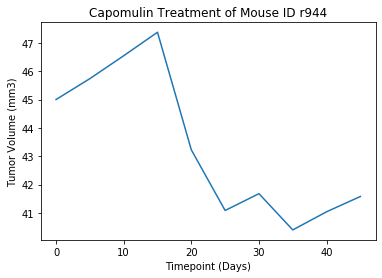

In [93]:
plt.plot(time,volume)
plt.title("Capomulin Treatment of Mouse ID " + cap_id)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

In [94]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#grab average tumor volume
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [95]:
cap_mouse = capomulin_df.groupby("Mouse ID")

In [96]:
cap_mice_AvVol = cap_mouse["Tumor Volume (mm3)"].mean()
cap_mice_weight = cap_mouse["Weight (g)"].mean()

In [97]:
cap_weight_vol_frame = {"Volume": cap_mice_AvVol,
                        "Weight": cap_mice_weight}

In [98]:
cap_weight_vol = pd.DataFrame(cap_weight_vol_frame)

In [99]:
mVol = cap_weight_vol.iloc[:,0]
mWeight = cap_weight_vol.iloc[:,1]

Text(0, 0.5, 'Average Tumor Volume (mm3)')

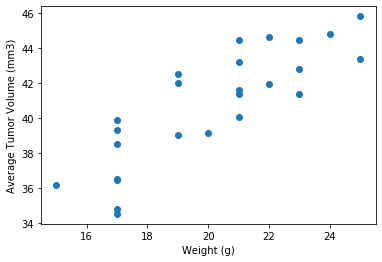

In [100]:
plt.scatter(mWeight,mVol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

In [101]:
weightVol_r = (st.pearsonr(mWeight,mVol))[0]

In [102]:
(m, b, rvalue, pvalue, stderr) = st.linregress(mWeight, mVol)
yVals = b+ (mWeight*m)

The correlation between weight and volume is 0.8419363424694717.


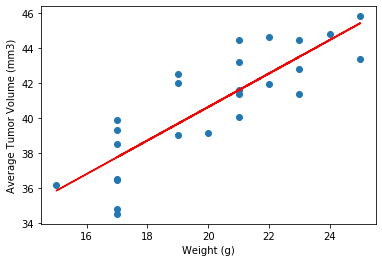

In [103]:
print("The correlation between weight and volume is " + str(weightVol_r) + ".")
plt.scatter(mWeight,mVol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(mWeight,yVals, color = 'r')